### [ 데이터기반 시각화 ]
- 데이터 : 남북한발전전력.xlsx
- 남북한 수력발전전력량에 대한 시각화

(1) 모듈 로딩 <hr>

In [49]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

(2) 데이터 준비

In [50]:
file = '../DATA/남북한발전전력량.xlsx'

- 실제 데이터 파일 확인 결과
    * 첫 번째 행은 컬럼명 데이터
    * 첫 번째와 두 번째 컬럼을 행 인덱스 사용으로 적합
    * 입력값인 없는 쉘에 '-' 채워져 있음 => isnull() / isna()로는 결측치 체크 X
        * 삭제하지 않고 대체로 처리 => 대체값 0

(3) 데이터 저장 : EXCEL => DataFrame

In [51]:
korpowerDF = pd.read_excel(file, index_col = [0, 1])

(4) 데이터 확인

- (4-1) 데이터 타입과 실제 데이터 체크
     * '-' 데이터를 '0'으로 변경
    * object 타입을 uint16으로 변경

In [52]:
print(korpowerDF.index, korpowerDF.columns, sep = '\n\n')

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


(5) 데이터 전처리

- (5-1) 데이터 자료형 변환

In [53]:
# '-' => '0'
korpowerDF2 = korpowerDF.replace('-', 0)

In [54]:
# object => int16
korpowerDF2 = korpowerDF2.astype('int16')
korpowerDF2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int16
 1   1991    9 non-null      int16
 2   1992    9 non-null      int16
 3   1993    9 non-null      int16
 4   1994    9 non-null      int16
 5   1995    9 non-null      int16
 6   1996    9 non-null      int16
 7   1997    9 non-null      int16
 8   1998    9 non-null      int16
 9   1999    9 non-null      int16
 10  2000    9 non-null      int16
 11  2001    9 non-null      int16
 12  2002    9 non-null      int16
 13  2003    9 non-null      int16
 14  2004    9 non-null      int16
 15  2005    9 non-null      int16
 16  2006    9 non-null      int16
 17  2007    9 non-null      int16
 18  2008    9 non-null      int16
 19  2009    9 non-null      int16
 20  2010    9 non-null      int16
 21  2011    9 non-null      int16
 22  2012    9 non-null      int16
 

(6) 데이터 분석 작업

- 남북한의 수력발전량 비교하기

In [55]:
# 수력발전량 행 데이터 추출
waterDF = korpowerDF2.xs('수력', level = 1)
waterDF.shape

(2, 27)

In [56]:
waterDF

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
전력량 (억㎾h),,,,,,,,,,,,,,,,,,,,,
남한,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
북한,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128


In [57]:
waterDF.loc['남한']

1990    64
1991    51
1992    49
1993    60
1994    41
1995    55
1996    52
1997    54
1998    61
1999    61
2000    56
2001    42
2002    53
2003    69
2004    59
2005    52
2006    52
2007    50
2008    56
2009    56
2010    65
2011    78
2012    77
2013    84
2014    78
2015    58
2016    66
Name: 남한, dtype: int16

In [58]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [59]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

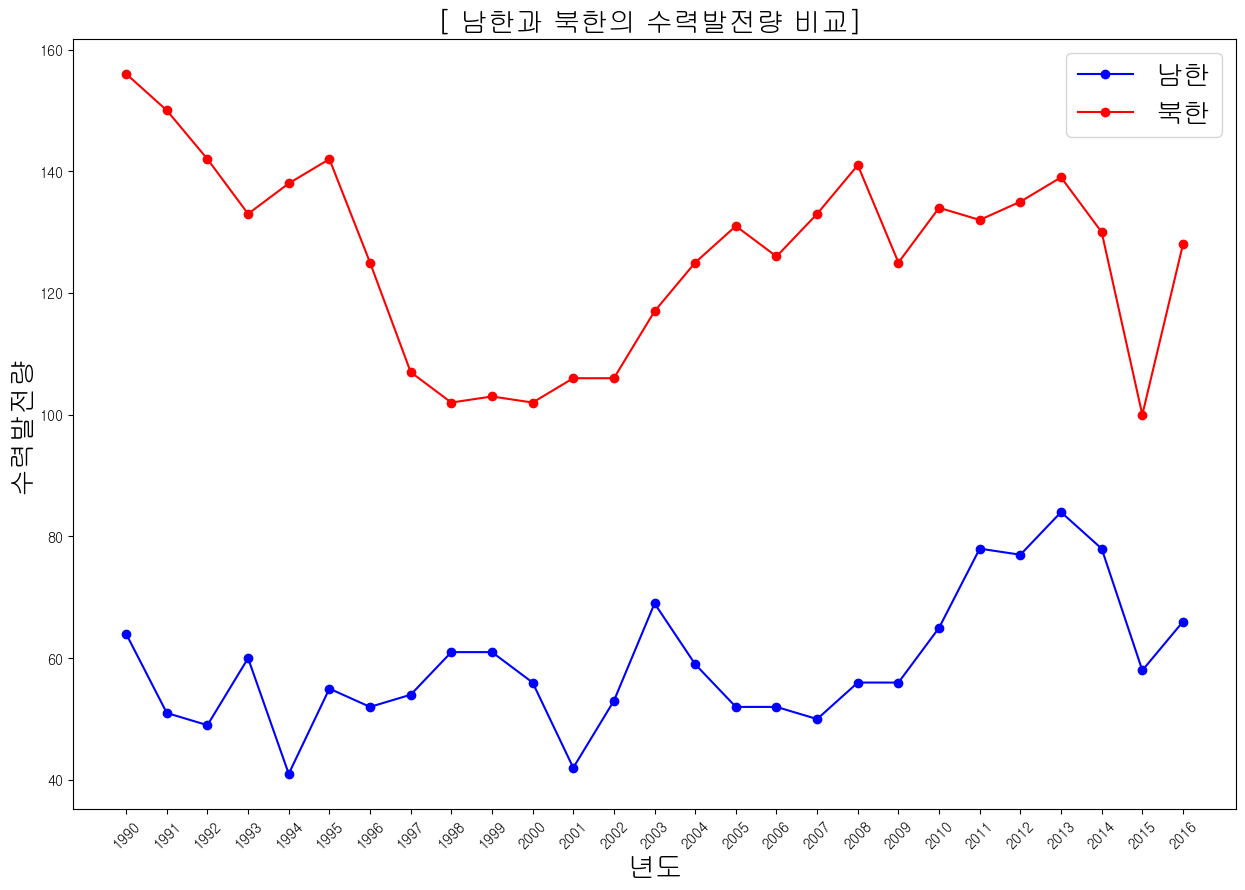

In [60]:
plt.figure(figsize = (15, 10))
plt.plot(waterDF.loc['남한'], 'bo-', waterDF.loc['북한'], 'ro-')
plt.title('[ 남한과 북한의 수력발전량 비교]', fontsize = 20)
plt.xlabel('년도', fontsize = 20)
plt.ylabel('수력발전량', fontsize = 20)
plt.xticks(rotation = 45)
plt.legend(['남한', '북한'], fontsize = 20)